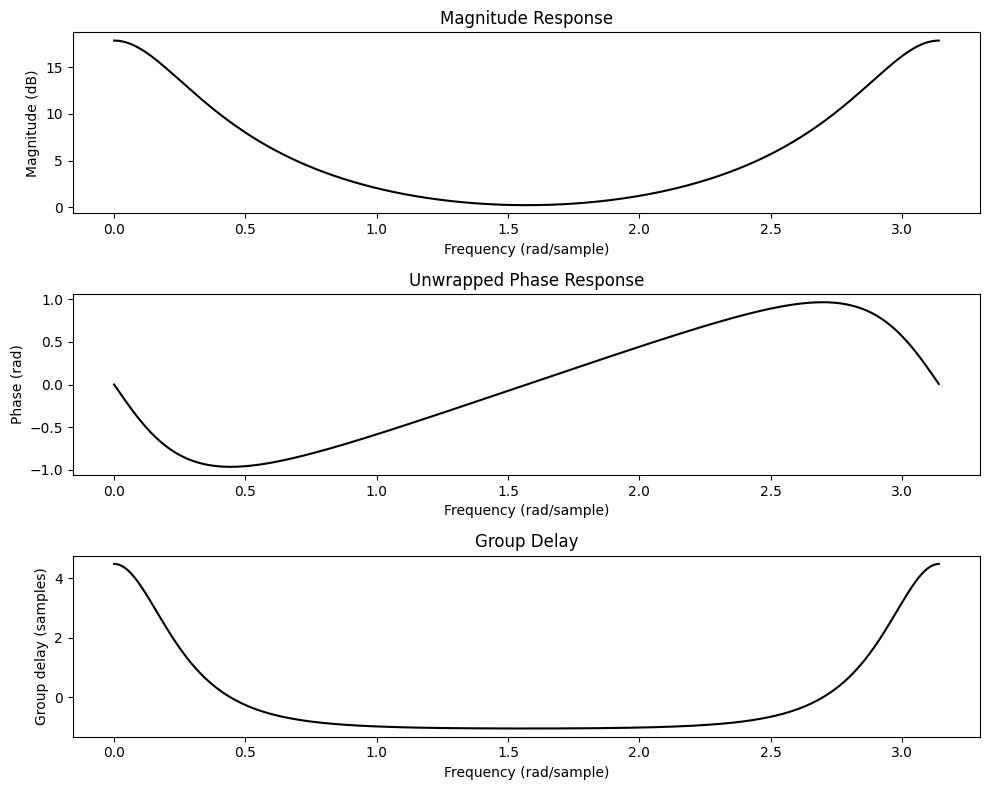

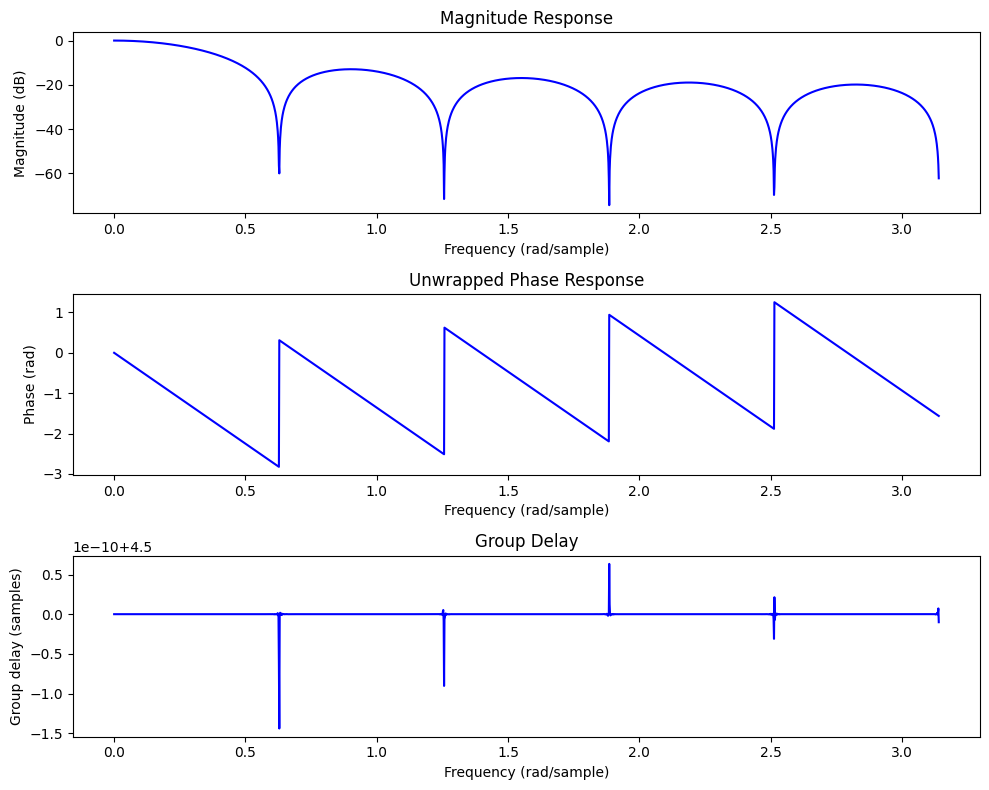

In [10]:
# 01 

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_system(system, fs=2*np.pi, N=2048, color='k'):
    # 1) Systeminterpretation
    if len(system) == 3:
        z, p, k = system
        b, a = signal.zpk2tf(z, p, k)
    elif len(system) == 2:
        b, a = system
        z, p, k = signal.tf2zpk(b, a)
    else:
        raise ValueError("system must be (z,p,k) or (b,a)")

    # 2) Frequency response (discrete-time)
    w, H = signal.freqz(b, a, worN=N)  # w in rad/sample, 0..pi

    mag = 20 * np.log10(np.maximum(np.abs(H), 1e-12))
    phase = np.unwrap(np.angle(H))

    # 3) Group delay
    # Option A: SciPy
    w_gd, gd = signal.group_delay((b, a), w=w)

    # 4) Plot
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))

    axs[0].plot(w, mag, color=color)
    axs[0].set_title('Magnitude Response')
    axs[0].set_xlabel('Frequency (rad/sample)')
    axs[0].set_ylabel('Magnitude (dB)')

    axs[1].plot(w, phase, color=color)
    axs[1].set_title('Unwrapped Phase Response')
    axs[1].set_xlabel('Frequency (rad/sample)')
    axs[1].set_ylabel('Phase (rad)')

    axs[2].plot(w_gd, gd, color=color)
    axs[2].set_title('Group Delay')
    axs[2].set_xlabel('Frequency (rad/sample)')
    axs[2].set_ylabel('Group delay (samples)')

    plt.tight_layout()
    plt.show()

# System 1 as (z,p,k)
system1 = ([0.5, -0.5], [0.75, -0.75, 0.75, -0.75], 2)

# System 2 as (b,a) FIR moving-average-like
b2 = 0.1*np.ones(10)
a2 = [1]
system2 = (b2, a2)

plot_system(system1, color='k')
plot_system(system2, color='b')

In [13]:
import numpy as np

# Function to compute transfer function coefficients and expressions
def compute_transfer_function(zero, pole, gain):
    # Calculate b and a coefficients
    b = gain * np.poly(zero)
    a = np.poly(pole)
    
    # Construct transfer function as a string for display
    transfer_function = f"{gain} * (" + " * ".join([f"(z - {z:.2f})" for z in zero]) + ") / (" + " * ".join([f"(z - {p:.2f})" for p in pole]) + ")"
    
    return transfer_function, b, a

# System 1: Zero at z = 0.8 (double), Pole at z = 0.95 (double), Gain = 0.063
z1 = [0.8, 0.8]
p1 = [0.95, 0.95]
gain1 = 0.063
H1, b1, a1 = compute_transfer_function(z1, p1, gain1)

# System 2: Zero at z = 0.95 (double), Pole at z = 0.8 (double), Gain = 1
z2 = [0.95, 0.95]
p2 = [0.8, 0.8]
gain2 = 1
H2, b2, a2 = compute_transfer_function(z2, p2, gain2)

# System 3: Zeros at z = ±0.25j, Poles at z = ±0.75j, Gain = 0.45
z3 = [0.25j, -0.25j]
p3 = [0.75j, -0.75j]
gain3 = 0.45
H3, b3, a3 = compute_transfer_function(z3, p3, gain3)

# Print the results
def print_transfer_function(system_number, H, b, a):
    print(f"System {system_number}:")
    print(f"Transfer Function H(z): {H}")
    print(f"b coefficients: {b}")
    print(f"a coefficients: {a}")
    print()

# Output for all systems
print_transfer_function(1, H1, b1, a1)
print_transfer_function(2, H2, b2, a2)
print_transfer_function(3, H3, b3, a3)



System 1:
Transfer Function H(z): 0.063 * ((z - 0.80) * (z - 0.80)) / ((z - 0.95) * (z - 0.95))
b coefficients: [ 0.063   -0.1008   0.04032]
a coefficients: [ 1.     -1.9     0.9025]

System 2:
Transfer Function H(z): 1 * ((z - 0.95) * (z - 0.95)) / ((z - 0.80) * (z - 0.80))
b coefficients: [ 1.     -1.9     0.9025]
a coefficients: [ 1.   -1.6   0.64]

System 3:
Transfer Function H(z): 0.45 * ((z - 0.00+0.25j) * (z - -0.00-0.25j)) / ((z - 0.00+0.75j) * (z - -0.00-0.75j))
b coefficients: [0.45     0.       0.028125]
a coefficients: [1.     0.     0.5625]



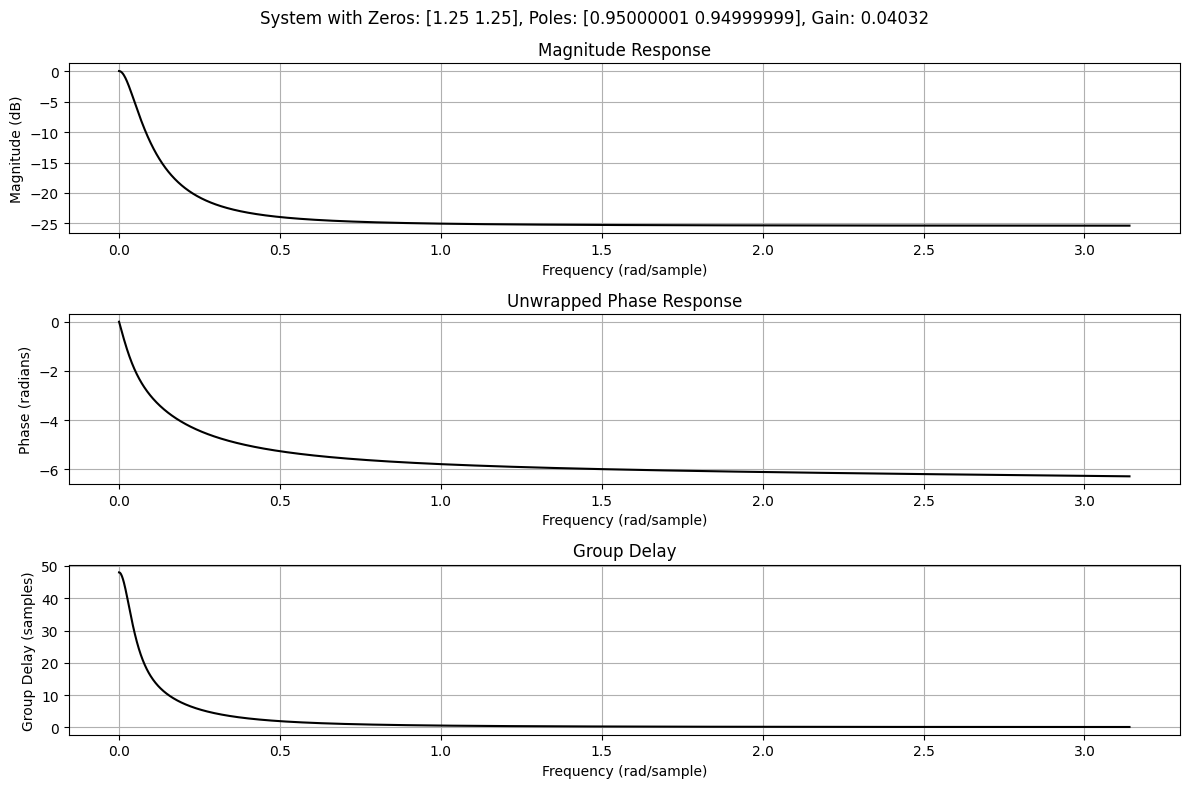

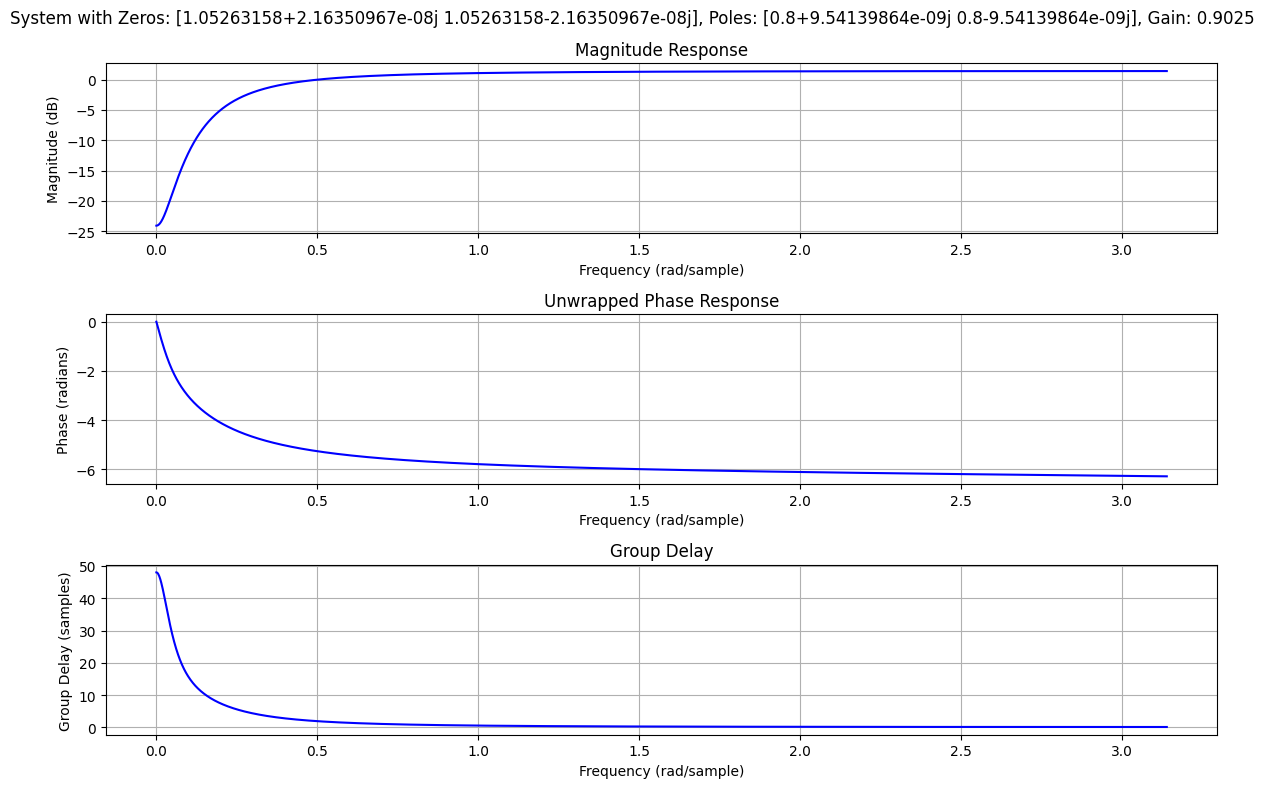

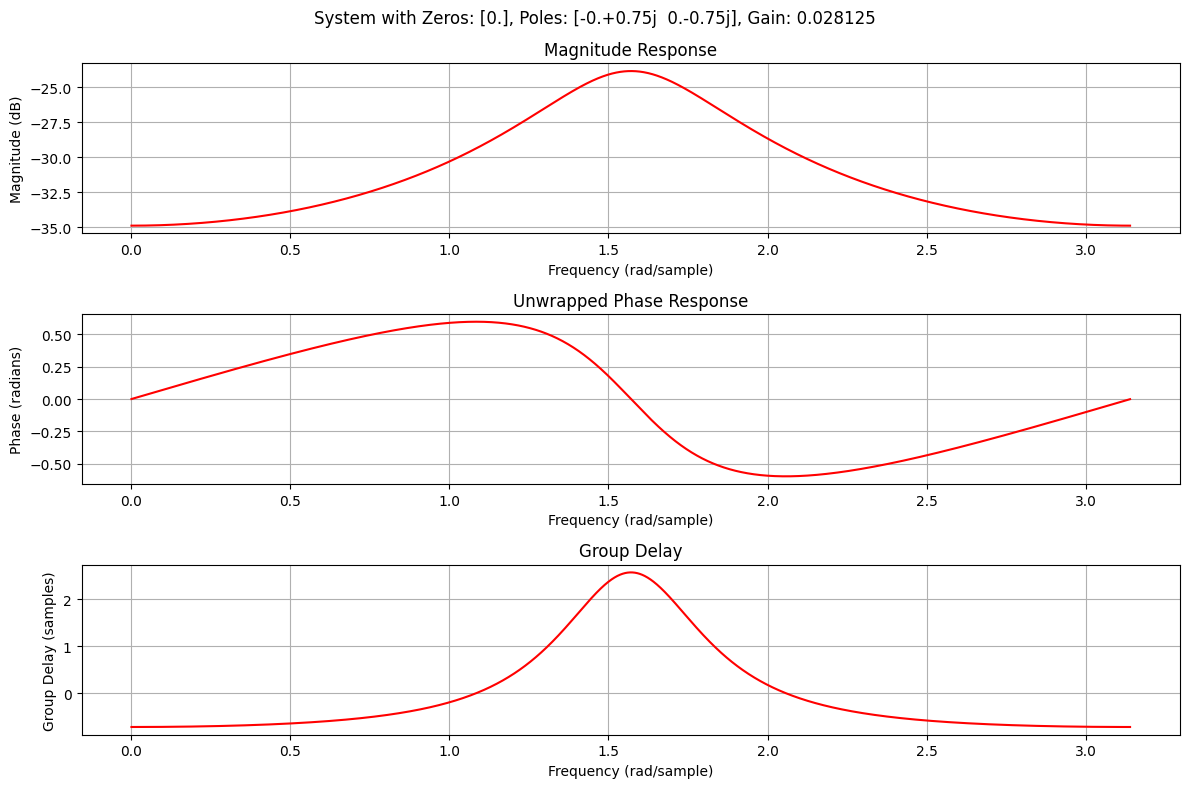

In [16]:
def plot_system(system, fs=44100, N=2048, color='k'):
    b, a = system
    w, H = signal.freqz(b, a, worN=N)  # Frequency response
    mag = 20 * np.log10(np.maximum(np.abs(H), 1e-12))
    phase = np.unwrap(np.angle(H))
    w_gd, gd = signal.group_delay((b, a), w=w)

    # Pole-Zero Diagram
    z, p, k = signal.tf2zpk(b, a)
    plt.figure(figsize=(12, 8))

    # Magnitude Response
    plt.subplot(3, 1, 1)
    plt.plot(w, mag, color=color)
    plt.title('Magnitude Response')
    plt.xlabel('Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.grid()

    # Phase Response
    plt.subplot(3, 1, 2)
    plt.plot(w, phase, color=color)
    plt.title('Unwrapped Phase Response')
    plt.xlabel('Frequency (rad/sample)')
    plt.ylabel('Phase (radians)')
    plt.grid()

    # Group Delay
    plt.subplot(3, 1, 3)
    plt.plot(w_gd, gd, color=color)
    plt.title('Group Delay')
    plt.xlabel('Frequency (rad/sample)')
    plt.ylabel('Group Delay (samples)')
    plt.grid()

    plt.suptitle(f'System with Zeros: {z}, Poles: {p}, Gain: {k}')
    plt.tight_layout()
    plt.show()

# Define the systems as (b, a)
system1 = (b1, a1)
system2 = (b2, a2)
system3 = (b3, a3)

# Plot each system
plot_system(system1, color='k')
plot_system(system2, color='b')
plot_system(system3, color='r')


In [20]:
# 02c 

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile  # Importing wavfile for reading .wav files
import sounddevice as sd

# TODO: ask about pyfar.signals.files (can we use our own samples?)
#import pyfar
#drum_signal = pyfar.signals.files.get_drum_signal()

# Read the .wav file
#fs, drum_signal = wavfile.read('fdrums.wav')  # Replace with your actual filename



# Converting stereo to mono if necessary
if drum_signal.ndim == 2:
    drum_signal = drum_signal.mean(axis=1)

# Coefficients for the systems
b1 = [ 0.063 ,  -0.1008  , 0.04032]
a1 =  [ 1.   ,  -1.9    ,  0.9025]

b2 =  [ 1.  ,  -1.9  , 0.9025]
a2 = [ 1.  , -1.6 ,  0.64]

b3 = [0.45  ,   0.  ,     0.028125]
a3 =  [1. ,    0. ,    0.5625]

# Define the systems for filtering
systems = [
    (b1, a1, 'System 1'),
    (b2, a2, 'System 2'),
    (b3, a3, 'System 3')
]

# Filter drum signal
filtered_signals = []
for b, a, label in systems:
    filtered_signal = signal.lfilter(b, a, drum_signal)
    filtered_signals.append((filtered_signal, label))

# Play back each filtered signal
for filtered_signal, label in filtered_signals:
    print(f"Playing {label}...")
    sd.play(filtered_signal, fs)
    sd.wait()


C:\Users\User\AppData\Local\Temp\ipykernel_34152\2591227378.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, drum_signal = wavfile.read('fdrums.wav')  # Replace with your actual filename


Playing System 1...


Playing System 2...
Playing System 3...


In [ ]:
Hier ist die **Komplettlösung für Aufgabe 3 (Incomplete z-Transfer functions)** so, dass du sie 1:1 aufs Lösungsblatt kopieren kannst (inkl. kurzer Begründung + Ergebnis-Pol/Nullstellen).

---

# Aufgabe 3 – Lösungen

## System 1 → All-pass

**Gegeben:**
Zeros: (z_n={2+2j,;2-2j})
Pole: (z_p={0.25-0.25j})

**All-pass-Bedingung:** Zu jedem Pol (p) gehört ein Zero bei (z=\frac{1}{p^*}).

[
p^*=0.25+0.25j,\qquad
\frac{1}{p^*}=\frac{0.25-0.25j}{0.25^2+0.25^2}=\frac{0.25-0.25j}{0.125}=2-2j
]

Das Zero (2-2j) ist bereits das passende All-pass-Zero zum Pol (0.25-0.25j). Das zusätzliche Zero (2+2j) verhindert (|H(e^{j\omega})|=1).

**Änderung (eine Operation):** Entferne das Zero (z=2+2j).

**Resultierendes System:**
Zeros: ({2-2j})
Pole: ({0.25-0.25j})

---

## System 2 → Stabil

**Gegeben:**
Zeros: (z_n={1,,-1,,j,,-j})
Pole: (z_p={-0.5,;0,;0.5,;1})

**Stabilitätskriterium (diskret, kausal):**
[
|p_k|<1 \text{ für alle Pole}
]
Der Pol bei (z=1) liegt auf dem Einheitskreis ((|1|=1)) und macht das System nicht stabil.

**Änderung (eine Operation):** Entferne den Pol (z=1).

**Resultierendes System:**
Zeros: ({1,,-1,,j,,-j}) (unverändert)
Pole: ({-0.5,;0,;0.5})

## System 3 → Minimum-phase

**Gegeben:**
Zeros: (z_n={-0.75j,;0.75j,;1.25j})
Pole: (z_p={0.5j,;-0.5j})

**Minimum-phase-Kriterium:**

* stabil: alle Pole (|p_k|<1)
* und alle Nullstellen (|z_k|<1)

Pole: (|0.5j|=0.5<1) ⇒ stabil.
Nullstellen: (|0.75j|=0.75<1), (|-0.75j|=0.75<1), aber (|1.25j|=1.25>1) ⇒ nicht minimum phase.

**Änderung (eine Operation):** Entferne die Nullstelle (z=1.25j).

**Resultierendes System:**
Zeros: ({-0.75j,;0.75j})
Pole: ({0.5j,;-0.5j})

---

## System 4 → Reellwertige Impulsantwort

**Gegeben:**
Zeros: (z_n={0.25+0.25j,;0.25-0.25j})
Pole: (z_p={0.5j})

**Bedingung für reellwertige Impulsantwort / reelle Koeffizienten:**
Komplexe Pole und Nullstellen müssen als **konjugierte Paare** auftreten.

Die Nullstellen liegen bereits als konjugiertes Paar vor. Beim Pol fehlt das konjugierte Gegenstück zu (0.5j), nämlich (-0.5j).

**Änderung (eine Operation):** Füge den Pol (z=-0.5j) hinzu.

**Resultierendes System:**
Zeros: ({0.25+0.25j,;0.25-0.25j})
Pole: ({0.5j,;-0.5j})

---

Wenn du willst, kann ich dir noch **kurz sagen, wie die Pole/Nullstellen jeweils im Diagramm eingezeichnet werden** (inkl. Einheitskreis) und wie du den Plottext (1–2 Sätze pro System) “schön” formulierst.

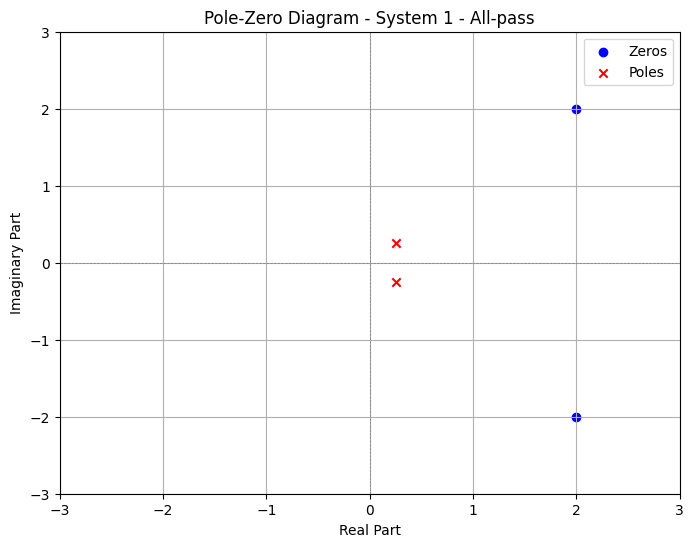

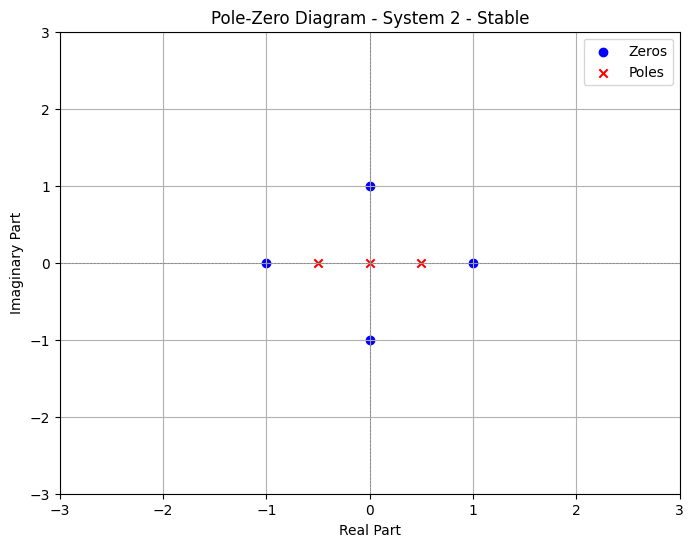

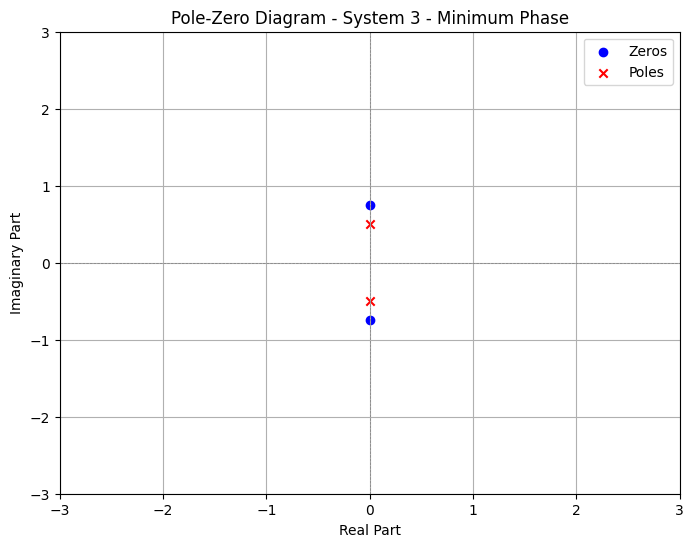

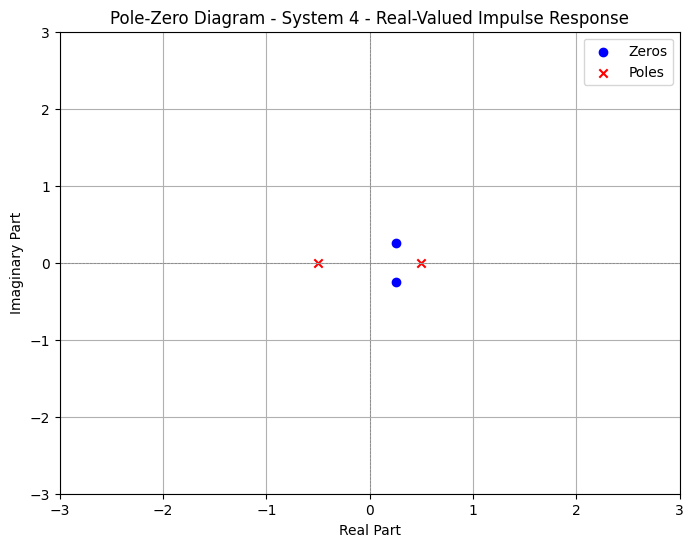

In [21]:
# 03 Incomplete z-Transfer functions

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_pole_zero_diagram(zeros, poles, label):
    plt.figure(figsize=(8, 6))
    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', label='Zeros', color='blue')
    plt.scatter(np.real(poles), np.imag(poles), marker='x', label='Poles', color='red')
    
    # Plot formatting
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.title(f'Pole-Zero Diagram - {label}')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.xlim([-3, 3])
    plt.ylim([-3, 3])
    plt.grid()
    plt.legend()
    plt.show()

# System 1: All-pass
zeros1 = np.array([2 + 2j, 2 - 2j])  # Original zeros
poles1 = np.array([0.25 - 0.25j, 0.25 + 0.25j])  # Modified poles
plot_pole_zero_diagram(zeros1, poles1, 'System 1 - All-pass')

# System 2: Stable
zeros2 = np.array([1, -1, 1j, -1j])  # Original zeros
poles2 = np.array([-0.5, 0, 0.5])  # Modified (removed pole at 1)
plot_pole_zero_diagram(zeros2, poles2, 'System 2 - Stable')

# System 3: Minimum Phase
zeros3 = np.array([-0.75j, 0.75j])  # Modified (removed zero at 1.25j)
poles3 = np.array([0.5j, -0.5j])  # Original poles
plot_pole_zero_diagram(zeros3, poles3, 'System 3 - Minimum Phase')

# System 4: Real-valued impulse response
zeros4 = np.array([0.25 + 0.25j, 0.25 - 0.25j])  # Original zeros
poles4 = np.array([0.5, -0.5])  # Modified to make poles real
plot_pole_zero_diagram(zeros4, poles4, 'System 4 - Real-Valued Impulse Response')



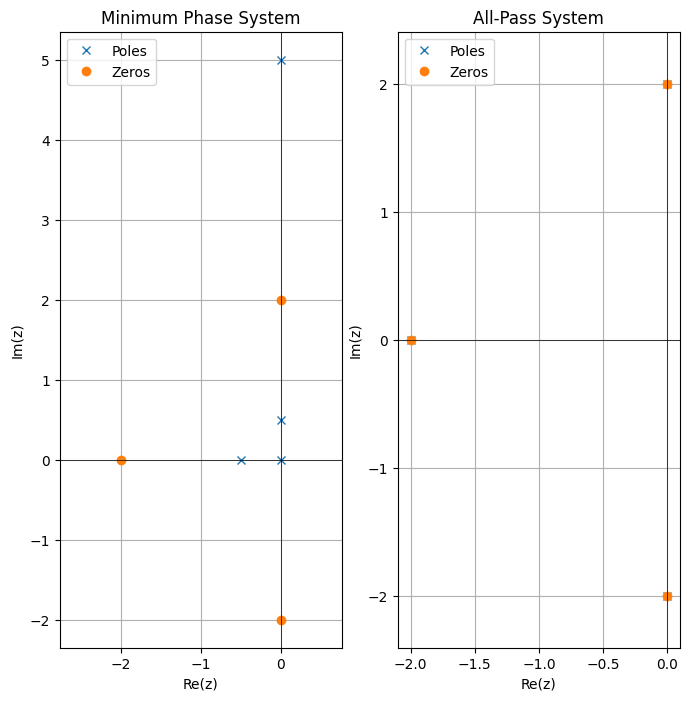

In [4]:
# 04a Minimum Phase systems

import numpy as np
import matplotlib.pyplot as plt

# Define poles and zeros
poles_min_phase = np.array([-0.5,0.5j, -0,5j])  # Example poles inside unit circle
zeros_min_phase = np.array([-2, 2j, -2j])  # Example zero inside unit circle
poles_all_pass = np.conj(zeros_min_phase)  # Zeros are conjugates of poles

# Plotting
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)  # Minimum phase system
plt.title("Minimum Phase System")
plt.plot(np.real(poles_min_phase), np.imag(poles_min_phase), 'x', label='Poles')
plt.plot(np.real(zeros_min_phase), np.imag(zeros_min_phase), 'o', label='Zeros')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.legend()
plt.axis('equal')

plt.subplot(1, 2, 2)  # All-pass system
plt.title("All-Pass System")
plt.plot(np.real(poles_all_pass), np.imag(poles_all_pass), 'x', label='Poles')
plt.plot(np.real(np.conj(zeros_min_phase)), np.imag(np.conj(zeros_min_phase)), 'o', label='Zeros')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.legend()
plt.axis('equal')

plt.show()



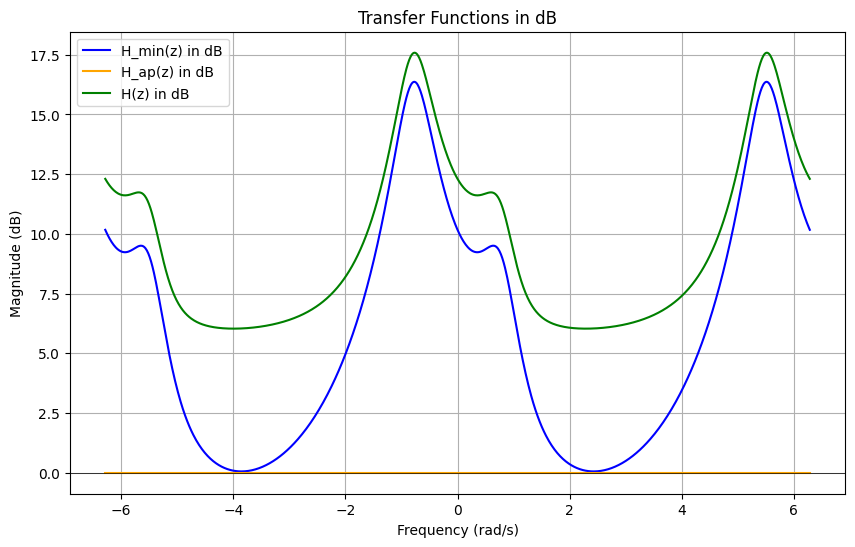

In [2]:
# 04b
def transfer_function(z, k, zeros, poles):
    numerator = np.prod([(1 - z_i/z) for z_i in zeros], axis=0)
    denominator = np.prod([(1 - p_i/z) for p_i in poles], axis=0)
    return k * numerator / denominator

# Parameters
k_min = 2  # Assume some gain for min phase
k_ap = 1   # Assume some gain for all-pass
w = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

H_min = transfer_function(np.exp(1j*w), k_min, zeros_min_phase, poles_min_phase)
H_ap = transfer_function(np.exp(1j*w), k_ap, poles_all_pass, poles_all_pass)
H = H_min + H_ap  # Superposition for the overall system

# Plot in dB
plt.figure(figsize=(10, 6))
plt.plot(w, 20 * np.log10(np.abs(H_min)), label='H_min(z) in dB', color='blue')
plt.plot(w, 20 * np.log10(np.abs(H_ap)), label='H_ap(z) in dB', color='orange')
plt.plot(w, 20 * np.log10(np.abs(H)), label='H(z) in dB', color='green')

plt.title("Transfer Functions in dB")
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Magnitude (dB)")
plt.axhline(0, color='black', lw=0.5)
plt.grid()
plt.legend()
plt.show()


In [3]:
# 04c
# Example: Finding gain values to meet specific criteria
k_min = np.abs(1 / H_min)
k_ap = np.abs(1 / H_ap)
print(f"Estimated k_min: {k_min}, k_ap: {k_ap}")


Estimated k_min: [0.31008684 0.31245432 0.31475471 0.31698596 0.31914606 0.32123303
 0.32324491 0.32517981 0.32703584 0.3288112  0.33050412 0.33211291
 0.33363592 0.33507162 0.33641854 0.33767533 0.33884074 0.33991366
 0.34089313 0.34177832 0.34256863 0.34326362 0.34386309 0.34436708
 0.34477593 0.34509024 0.34531099 0.3454395  0.34547749 0.34542713
 0.34529107 0.34507248 0.3447751  0.34440326 0.34396198 0.34345696
 0.34289468 0.34228238 0.34162821 0.34094116 0.34023119 0.33950921
 0.33878716 0.33807799 0.33739567 0.33675523 0.33617271 0.33566512
 0.33525042 0.33494739 0.33477558 0.33475515 0.33490672 0.3352512
 0.33580954 0.33660256 0.33765065 0.3389735  0.34058984 0.34251716
 0.34477142 0.3473668  0.35031546 0.35362735 0.35731003 0.36136854
 0.36580535 0.37062034 0.37581077 0.38137144 0.38729472 0.39357075
 0.40018762 0.40713154 0.4143871  0.42193747 0.42976465 0.43784971
 0.44617298 0.4547143  0.46345322 0.47236917 0.48144162 0.49065026
 0.49997514 0.50939675 0.51889614 0.52845504 0